In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('BankData.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
df.shape

(10127, 21)

In [12]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

### Analisis de Datos

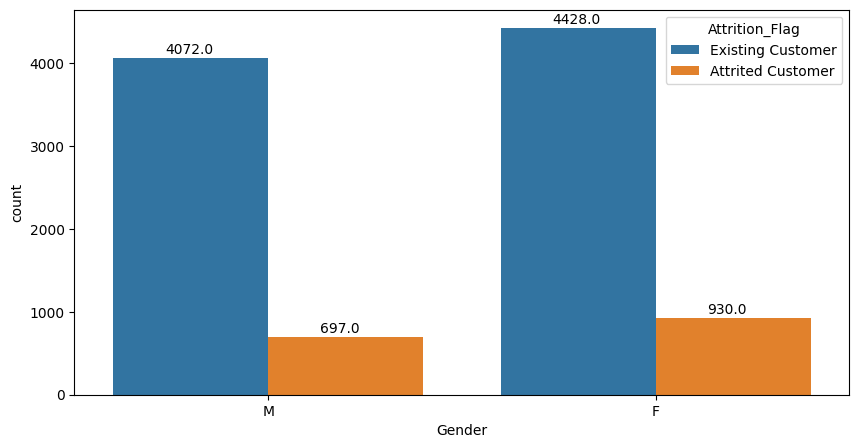

In [13]:
#Attrition/Gender comparison
plt.figure(figsize=(10,5))
plot = sns.countplot(x=df['Gender'], hue=df['Attrition_Flag'])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() +50)) #add data values and center them

In [14]:
#Function to automate
def plotColumn_vrs_target(df, colname, target):
    plt.figure(figsize=(10,5))
    plot = sns.countplot(x=df[colname], hue=df[target])
    plt.title(colname)
    
    for p in plot.patches:
        plot.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() +50)) #add data values and center them
    plt.show()

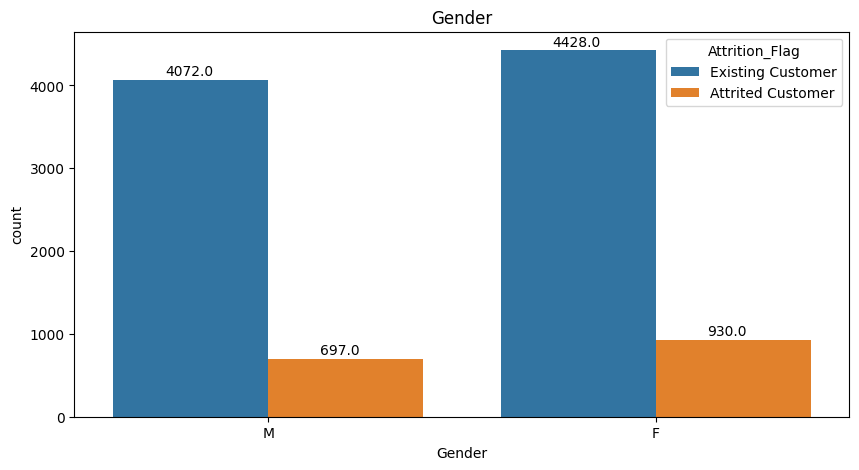

In [15]:
plotColumn_vrs_target(df,'Gender','Attrition_Flag')

In [16]:
categorical = []
discrete = []
continuous = []

explicatory_vars = list(df.columns)
explicatory_vars.remove('CLIENTNUM')
explicatory_vars.remove('Attrition_Flag')

# Extract categorical, discrete, and continuous variables for graphical comparison
for colName in explicatory_vars:
    if df[colName].dtype == 'object':
        categorical.append(colName)
    elif df[colName].dtype in ['int64', 'float64'] and len(df[colName].unique()) <= 30:
        discrete.append(colName)
    else:
        continuous.append(colName)    

categorical_and_discrete = categorical + discrete


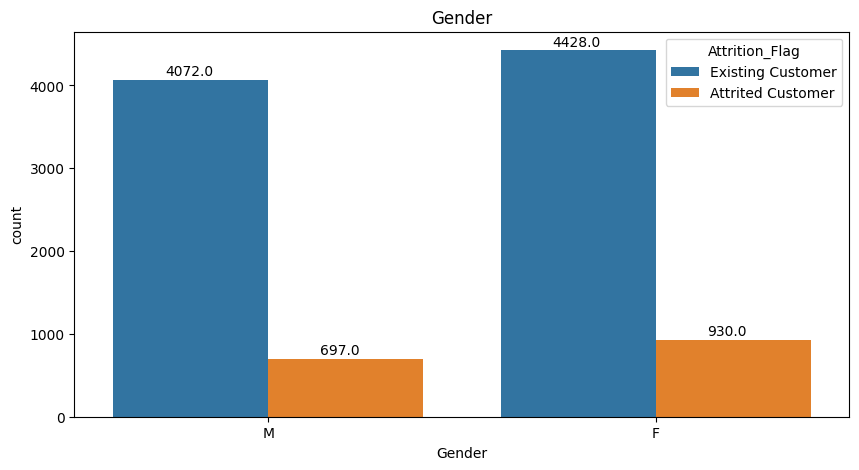

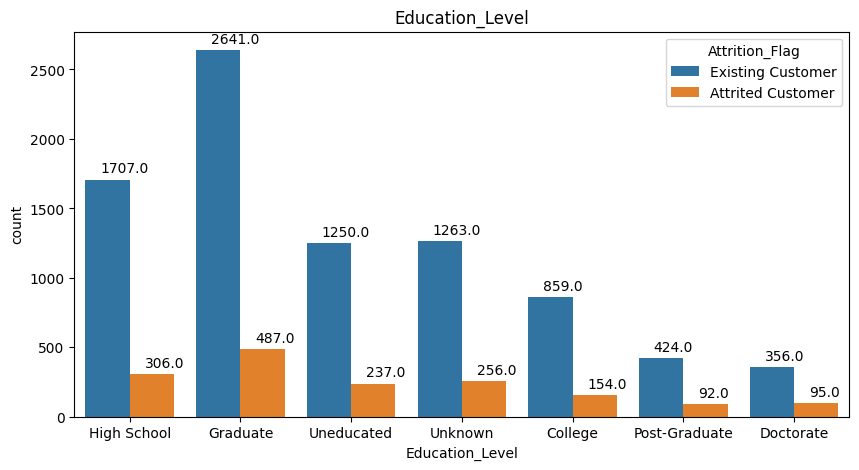

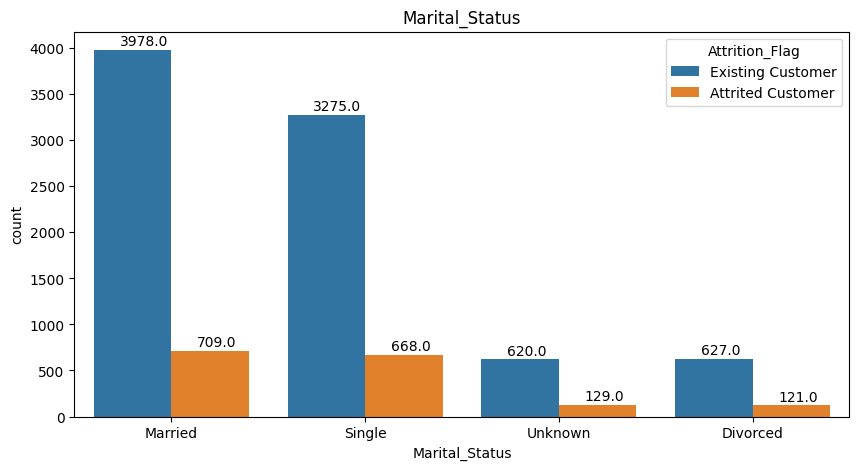

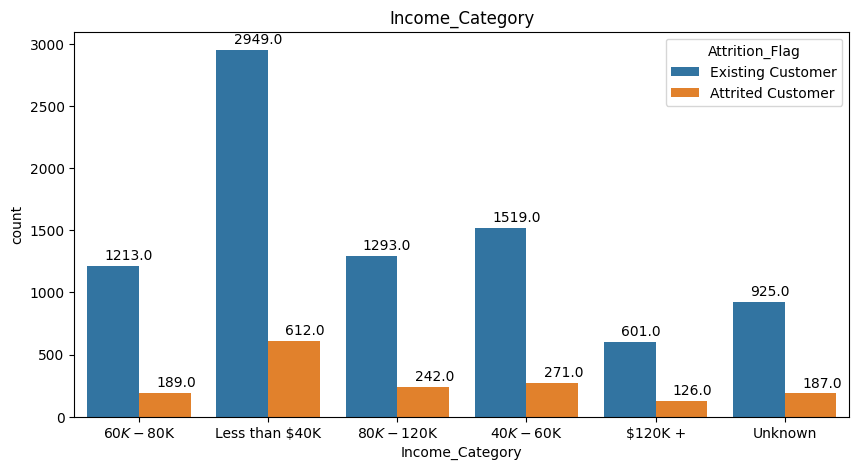

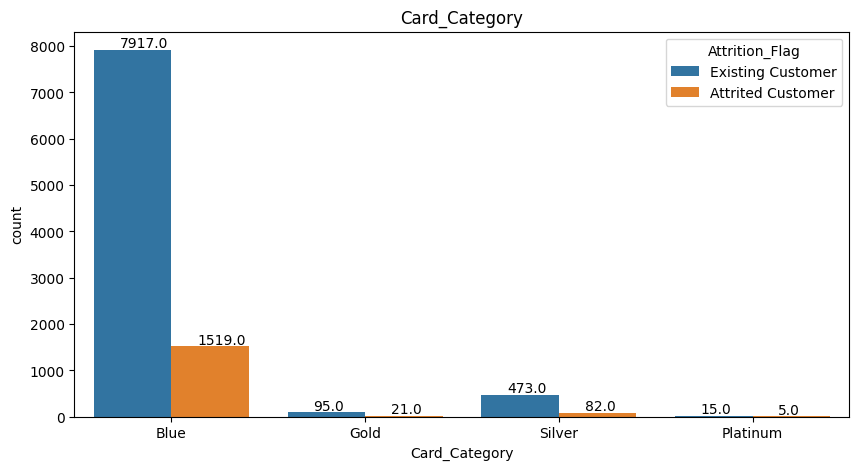

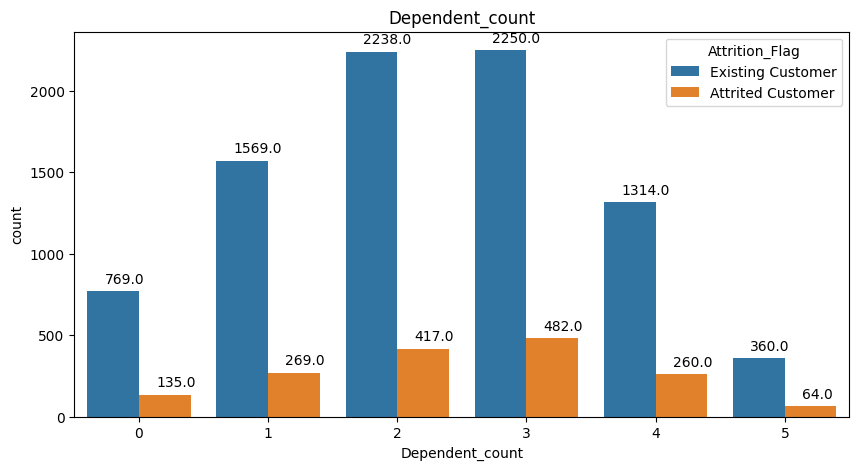

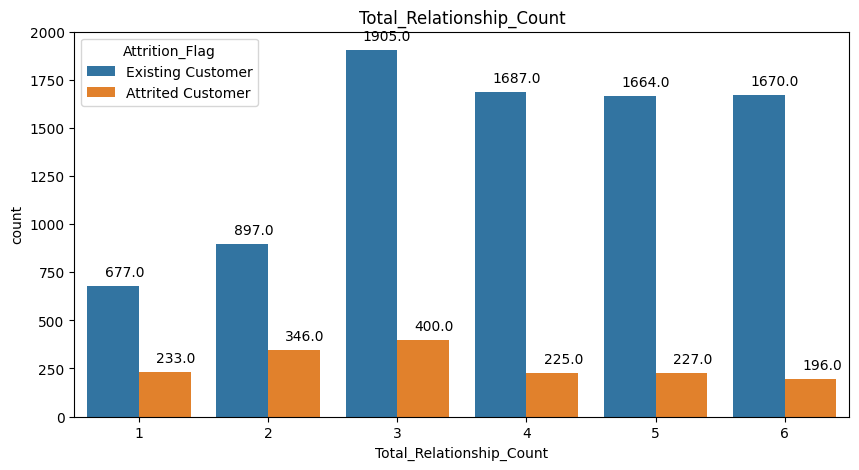

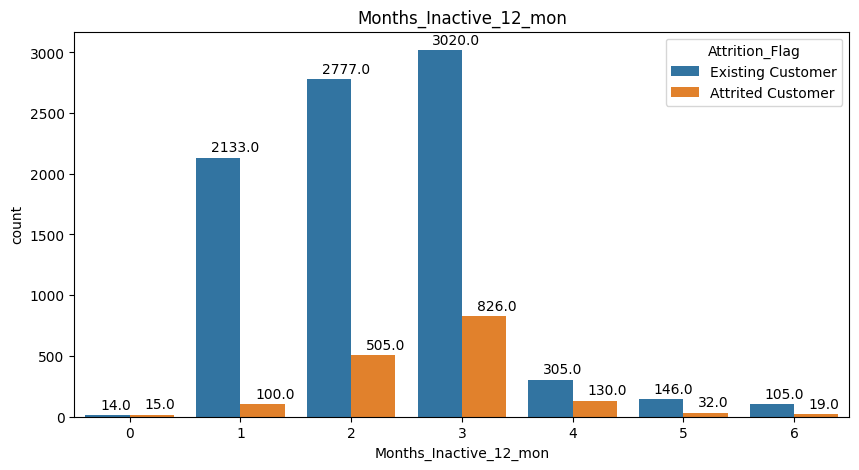

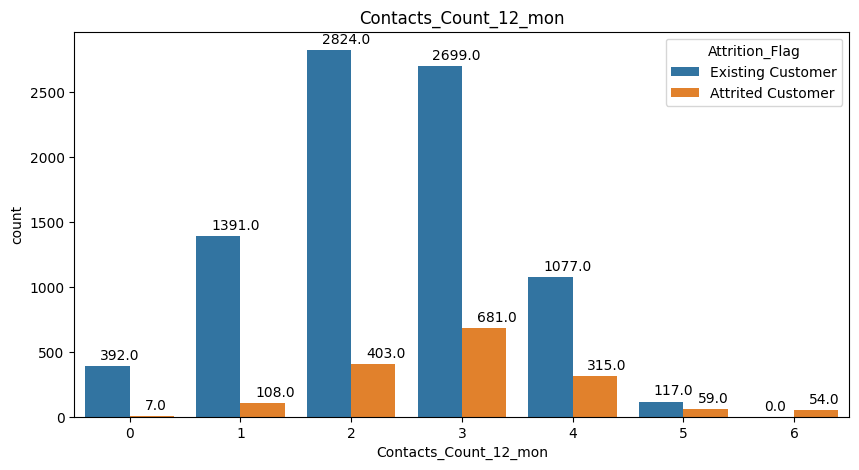

In [17]:
for colName in categorical_and_discrete:
    print('\n\n')
    plotColumn_vrs_target(df, colName,'Attrition_Flag')

#### Box plots para Variables Continuas

In [18]:
continuous

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Customer_Age


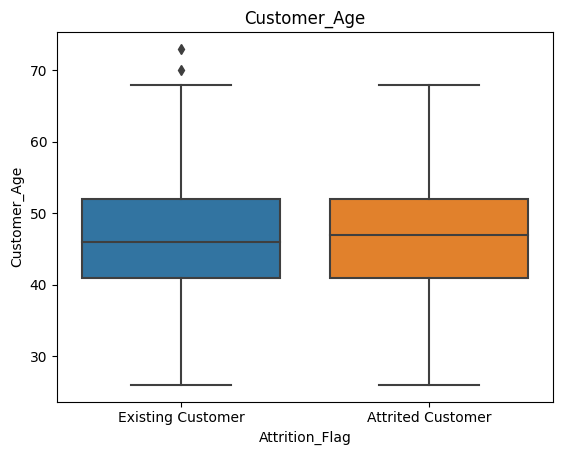

Months_on_book


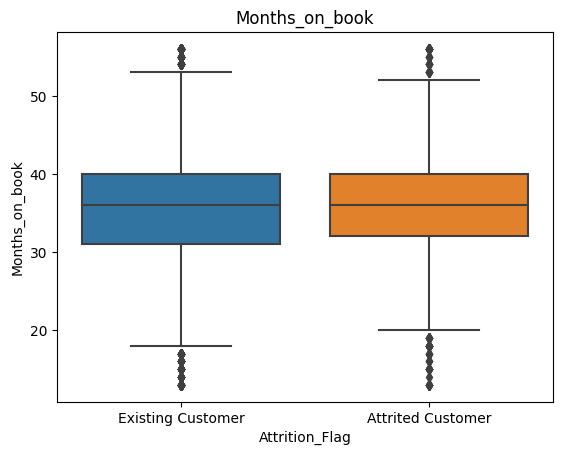

Credit_Limit


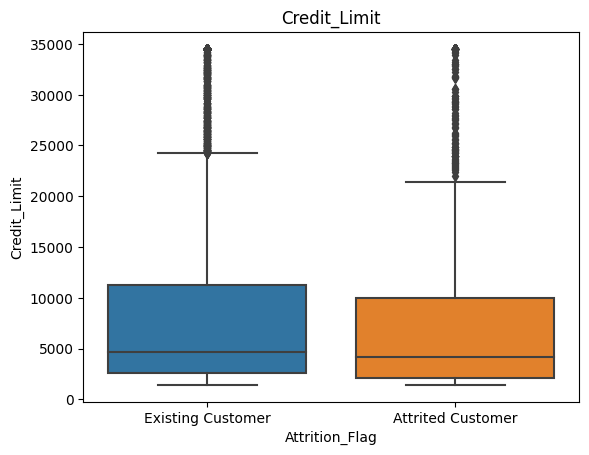

Total_Revolving_Bal


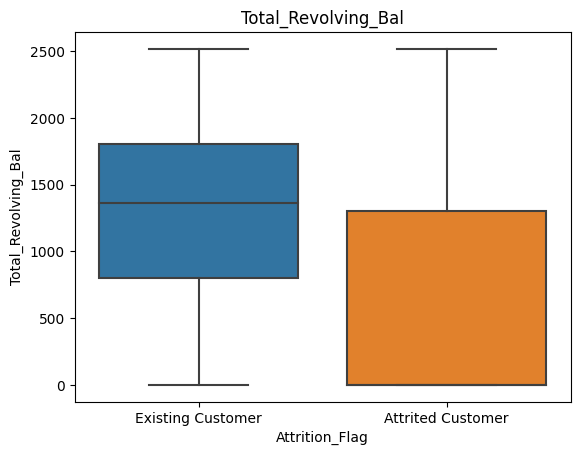

Avg_Open_To_Buy


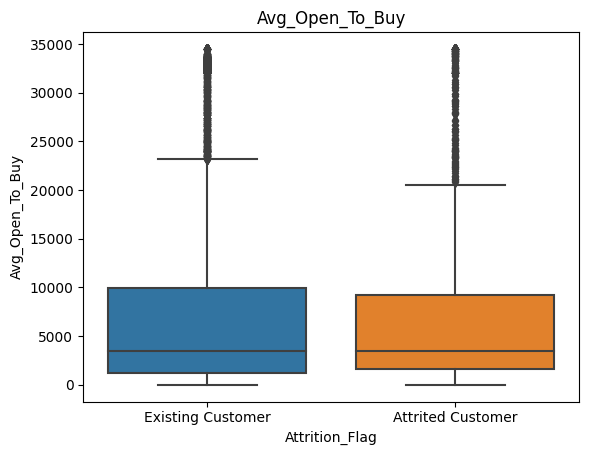

Total_Amt_Chng_Q4_Q1


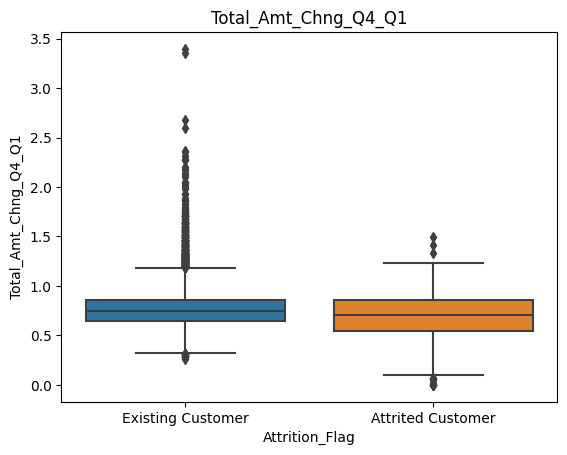

Total_Trans_Amt


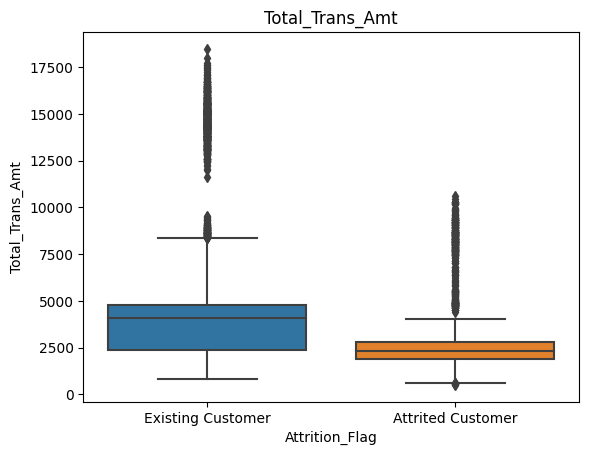

Total_Trans_Ct


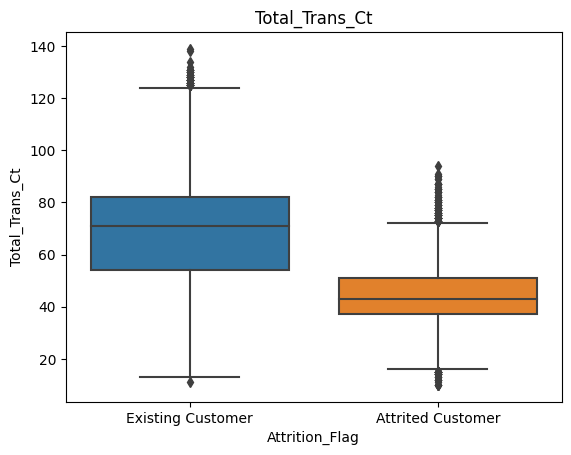

Total_Ct_Chng_Q4_Q1


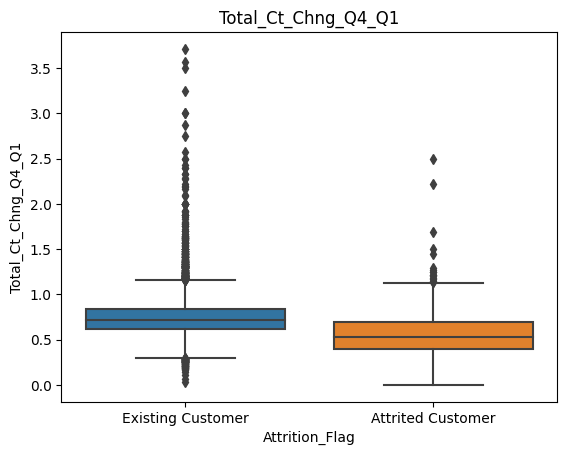

Avg_Utilization_Ratio


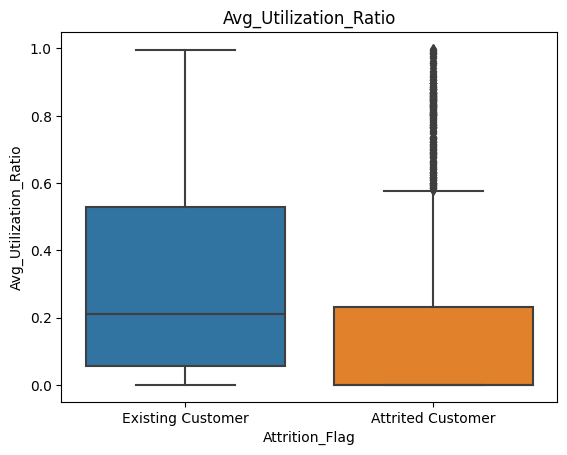

In [19]:
for colName in continuous:
    print(colName)
    sns.boxplot(x=df['Attrition_Flag'],y=df[colName])
    plt.title(colName)
    plt.show()

## Construccion de Modelo

#### 1. Balanceo de Datos

In [20]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [21]:
df_attrited = df[df['Attrition_Flag'] == 'Attrited Customer']
df_attrited.shape

(1627, 21)

In [22]:
df_existing = df[df['Attrition_Flag'] == 'Existing Customer']
df_existing.shape

(8500, 21)

In [23]:
cantidadExisting = 2*df_attrited.shape[0]
cantidadExisting

3254

In [24]:
df_existing = df_existing.sample(n=cantidadExisting,random_state=2023)

In [25]:
df = pd.concat([df_attrited, df_existing])
df.shape

(4881, 21)

#### 2. Ingenieria de Caracteristicas

##### 2.1 Imputacion de Variables

In [26]:
df.isnull().mean() # no null values. No need to imputate

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

##### 2.2 Codificacion de variables categoricas

In [27]:
df['Gender'].value_counts()

F    2604
M    2277
Name: Gender, dtype: int64

##### Codificacion de Columna Gender

In [28]:
ohe_gender = pd.get_dummies(df['Gender'], drop_first=True)
df['Gender'] = ohe_gender
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,0,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,0,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,0,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,1,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,1,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


Codificacion para el Resto de Variables

In [29]:
for colName in categorical:
    
    dict_for_encode = df[colName].value_counts().to_dict()
    df[colName]=df[colName].map(dict_for_encode)
    


In [30]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,2604,0,1498,2208,1713,4548,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,2604,0,245,2208,540,4548,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,2604,1,1498,2208,1713,4548,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,2277,2,1498,2208,369,4548,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,2277,2,1498,2208,646,265,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


In [31]:
df['Attrition_Flag'] = pd.get_dummies(df['Attrition_Flag'], drop_first=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,0,62,2604,0,1498,2208,1713,4548,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,0,66,2604,0,245,2208,540,4548,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,0,54,2604,1,1498,2208,1713,4548,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,0,56,2277,2,1498,2208,369,4548,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,0,48,2277,2,1498,2208,646,265,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


##### 3. Construccion de Modelos

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
X = df.drop(['Attrition_Flag','CLIENTNUM'], axis =1)
y = df['Attrition_Flag']

Split para entrenamiento y prueba

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2023)

Escalado de Variables

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#### Regresion Logistica

In [36]:
logit = LogisticRegression()
logit.fit(X_train_std, y_train) #entrenamos el modelo

logit_predicts = logit.predict(X_test_std)
logit_predicts

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [37]:
print(f"Accuracy: {round(accuracy_score(y_test,logit_predicts),4)}")
print(f"ROC-AUC: {round(roc_auc_score(y_test,logit_predicts),4)}")

Accuracy: 0.871
ROC-AUC: 0.8491


In [38]:
accuracy_score(y_test, logit_predicts)

0.8709897610921502

In [39]:
print("Matriz de Confusion: \n\n", pd.crosstab(y_test, logit_predicts, rownames=["Observación"], colnames=["Predicción"]))

Matriz de Confusion: 

 Predicción     0    1
Observación          
0            377  103
1             86  899


Good model to predict based on true positives and true negatives (0 - 0 and 1 -1)

### Arboles de Decision

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10).fit(X_train_std, y_train)
dt_predicts = dt.predict(X_test_std)

roc_auc = round(accuracy_score(y_test,dt_predicts),4)
acc = round(accuracy_score(y_test,dt_predicts),4)

print(f"Accuracy:{acc}")
print(f"ROC-AUC:{roc_auc}")

Accuracy:0.899
ROC-AUC:0.899


### GridSearch Automatico

In [41]:
from sklearn.model_selection import GridSearchCV, KFold


dt = DecisionTreeClassifier()

hyperparams_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[10,100]
}

grid_search = GridSearchCV(estimator=dt, param_grid=hyperparams_grid, n_jobs=-1,refit='roc_auc',
                           scoring=['roc_auc', 'accuracy'],cv=KFold(n_splits=10, shuffle=True, random_state=2025))
grid_search.fit(X_train_std,y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']


print(f"Mejores Hiper-parametros: {grid_search.best_params_}")
print(f"Metricas: {grid_search.best_score_}")
print(f"Mean Accuracy: {round(accuracies.mean(),4)} - std: {round(accuracies.std(),5)}")
print(f"Mean roc_auc: {round(roc_aucs.mean(),4)} - std: {round(roc_aucs.std(),5)}")



Mejores Hiper-parametros: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
Metricas: 0.91151760526744
Mean Accuracy: nan - std: nan
Mean roc_auc: nan - std: nan


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-p

### Regresion Logistica

In [42]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression

rl = LogisticRegression()

hyperparams_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'C': [0.1, 1, 10, 50]
}

grid_search = GridSearchCV(estimator=rl, param_grid=hyperparams_grid, n_jobs=-1, refit='roc_auc',
                           scoring=['roc_auc', 'accuracy'], cv=KFold(n_splits=10, shuffle=True, random_state=2025))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

print(f"Mejores Hiper-parametros: {grid_search.best_params_}")
print(f"Metricas: {grid_search.best_score_}")
print(f"Mean Accuracy: {round(accuracies.mean(), 4)} - std: {round(accuracies.std(), 5)}")
print(f"Mean roc_auc: {round(roc_aucs.mean(), 4)} - std: {round(roc_aucs.std(), 5)}")


Mejores Hiper-parametros: {'C': 10, 'penalty': 'l2'}
Metricas: 0.9228546573354928
Mean Accuracy: nan - std: nan
Mean roc_auc: nan - std: nan


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [44]:
# definimos estructura para agregar capas de la red
ann_classifier = Sequential()

# primera capa oculta
ann_classifier.add(Dense(units=200, kernel_initializer='uniform', activation='sigmoid'))

# segunda capa oculta
ann_classifier.add(Dense(units=100, kernel_initializer='uniform', activation='sigmoid'))

# tercera capa oculta
ann_classifier.add(Dense(units=200, kernel_initializer='uniform', activation='sigmoid'))

# capa de salida
ann_classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


In [45]:
# definimos la configuracion del optimizador
ann_classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [46]:
# definimos los parametros de entrenamient
ann_classifier.fit(X_train_std, y_train, batch_size=20, epochs=150)

Epoch 1/150
171/171 [==============================] - 1s 1ms/step - loss: 0.6127 - accuracy: 0.6727
Epoch 2/150
171/171 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8290
Epoch 3/150
171/171 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8384
Epoch 4/150
171/171 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8410
Epoch 5/150
171/171 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8516
Epoch 6/150
171/171 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8513
Epoch 7/150
171/171 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8530
Epoch 8/150
171/171 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8571
Epoch 9/150
171/171 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8557
Epoch 10/150
171/171 [==============================] - 0s 1ms/step - loss: 0.3326 - accura

In [49]:
y_preds = ann_classifier(X_test_std)
ann_preds = (y_preds >= 0.5)
ann_preds

<tf.Tensor: shape=(1465, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])>

In [48]:
roc_auc = round(roc_auc_score(y_test, ann_preds), 4)
acc = round(accuracy_score(y_test, ann_preds), 4)

print(f"Accuracy: {acc}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.927
ROC-AUC: 0.9099


### SVM


In [52]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_classifier = svm.SVC(kernel='linear')

svm_classifier.fit(X_train_std, y_train)

y_preds = svm_classifier.predict(X_test_std)

In [53]:
print("Accuracy: ", accuracy_score(y_test, y_preds))

Accuracy:  0.8662116040955632


### KNN

In [54]:
## KNN model

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train_std, y_train)

y_preds = knn_classifier.predict(X_test_std)

print("Accuracy: ", accuracy_score(y_test, y_preds))

Accuracy:  0.8450511945392492


### NB

In [55]:
## NB MODEL

from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train_std, y_train)

y_preds = nb_classifier.predict(X_test_std)

print("Accuracy: ", accuracy_score(y_test, y_preds))

Accuracy:  0.8081911262798634


### LDA

In [56]:
## LDA model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis()

lda_classifier.fit(X_train_std, y_train)

y_preds = lda_classifier.predict(X_test_std)

print("Accuracy: ", accuracy_score(y_test, y_preds))

Accuracy:  0.8655290102389078


### QDA

In [58]:
### QDA model

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_classifier = QuadraticDiscriminantAnalysis()

qda_classifier.fit(X_train_std, y_train)

y_preds = qda_classifier.predict(X_test_std)

print("Accuracy: ", accuracy_score(y_test, y_preds))


Accuracy:  0.8573378839590444


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
